In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("Customer-Churn.csv")

In [3]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6674,6258-NGCNG,Male,0,No,No,7,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,23.50,173,No
2209,4365-MSDYN,Male,0,Yes,No,8,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),19.55,161.15,No
919,5149-TGWDZ,Female,0,No,No,21,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,104.55,2239.4,No
416,4686-GEFRM,Male,0,Yes,No,70,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),98.70,6858.9,No
2533,5397-NSKQG,Male,0,Yes,Yes,67,No,No phone service,DSL,Yes,...,No,No,Yes,Yes,Two year,No,Credit card (automatic),50.90,3281.65,No


In [4]:
df.shape

(7043, 21)

In [5]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.TotalCharges.values,df.MonthlyCharges.values

(array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
       dtype=object),
 array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65]))

In [7]:
pd.to_numeric

<function pandas.core.tools.numeric.to_numeric(arg, errors='raise', downcast=None)>

In [8]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [11]:
df.iloc[488]['TotalCharges']

' '

In [12]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [13]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

C:\Users\brago\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [14]:
df1.TotalCharges.dtypes

dtype('float64')

In [15]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

In [16]:
import matplotlib.pyplot as plt

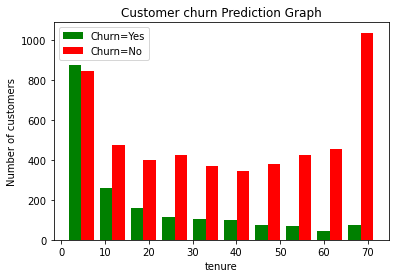

In [17]:
plt.xlabel('tenure')
plt.ylabel('Number of customers')
plt.title('Customer churn Prediction Graph')
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

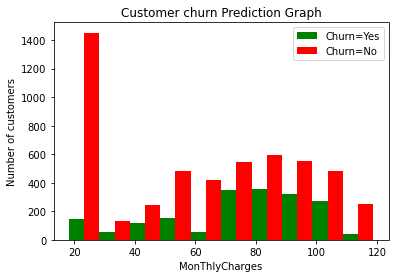

In [18]:
mc_churn_no=df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel('MonThlyCharges')
plt.ylabel('Number of customers')
plt.title('Customer churn Prediction Graph')

plt.hist([mc_churn_yes,mc_churn_no],rwidth=1.25,color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [19]:
def print_unique_and_object_value(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}')

In [20]:
print_unique_and_object_value(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [21]:
df1.replace('No phone service','No',inplace=True)
df1.replace('No internet service','No',inplace=True)
print_unique_and_object_value(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


C:\Users\brago\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [22]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
               'StreamingTV','StreamingMovies','PaperlessBilling','Churn']


for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\brago\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [23]:
df1['gender'].replace('Male',0,inplace=True)
df1['gender'].replace('Female',1,inplace=True)

In [24]:
for column in df1:
    print(f'{column}: {df1[column].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [25]:
#One Hot Encoding
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [26]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1850,1,1,1,0,47,1,1,1,1,1,...,1,0,0,1,0,0,0,1,0,0
4569,1,0,0,0,22,1,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
6364,0,0,0,1,27,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [27]:
df2.shape

(7032, 27)

In [28]:
df2.tenure.max(),df2.TotalCharges.max(),df2.MonthlyCharges.max()

(72, 8684.8, 118.75)

In [29]:
cols_to_scale=['tenure','TotalCharges','MonthlyCharges']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [30]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3020,0,0,0,1,0.450704,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
5576,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
6242,1,0,1,1,1.000000,1,1,1,1,1,...,0,1,0,0,0,1,0,1,0,0
5354,1,0,0,1,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3578,1,0,0,0,0.549296,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1


In [31]:
for column in df2:
    print(f'{column}: {df2[column].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [32]:
x=df2.drop('Churn',axis='columns')
y=df2["Churn"]

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)
X_train.shape,X_test.shape

((4922, 26), (2110, 26))

In [34]:
import keras
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(12,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

model.fit(X_train,y_train,epochs=30)


Epoch 1/30
154/154 [==============================] - 5s 3ms/step - loss: 0.5228 - accuracy: 0.7383
Epoch 2/30
154/154 [==============================] - 0s 3ms/step - loss: 0.4356 - accuracy: 0.7909
Epoch 3/30
154/154 [==============================] - 0s 3ms/step - loss: 0.4234 - accuracy: 0.7995
Epoch 4/30
154/154 [==============================] - 0s 3ms/step - loss: 0.4165 - accuracy: 0.8037
Epoch 5/30
154/154 [==============================] - 1s 3ms/step - loss: 0.4117 - accuracy: 0.8058
Epoch 6/30
154/154 [==============================] - 1s 4ms/step - loss: 0.4086 - accuracy: 0.8090
Epoch 7/30
154/154 [==============================] - 1s 4ms/step - loss: 0.4071 - accuracy: 0.8104
Epoch 8/30
154/154 [==============================] - 0s 3ms/step - loss: 0.4046 - accuracy: 0.8117
Epoch 9/30
154/154 [==============================] - 1s 3ms/step - loss: 0.4033 - accuracy: 0.8143
Epoch 10/30
154/154 [==============================] - 1s 3ms/step - loss: 0.4018 - accuracy: 0.8135

In [35]:
model.evaluate(X_test,y_test)

66/66 [==============================] - 0s 3ms/step - loss: 0.4534 - accuracy: 0.7863


[0.45340102910995483, 0.7862558960914612]

In [36]:
yp=model.predict(X_test)
yp[:5]

array([[0.18252064],
       [0.37107426],
       [0.01118866],
       [0.7946382 ],
       [0.49746546]], dtype=float32)

In [37]:
y_pred=[]
for i in yp:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [38]:
y_pred[:5]

[0, 0, 0, 1, 0]

In [39]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1511
           1       0.65      0.53      0.58       599

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.78      0.79      0.78      2110



Text(51.0, 0.5, 'Truth')

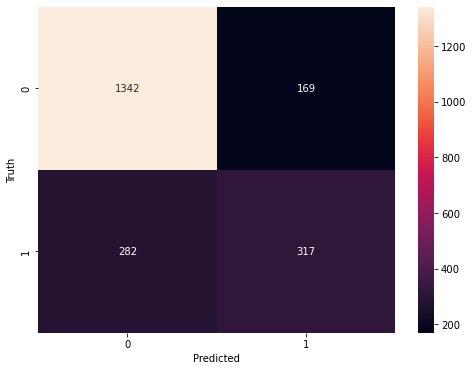

In [41]:
import tensorflow as tf
import seaborn as sns
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [42]:
def get_model():
    model=keras.Sequential([
        keras.layers.Dense(20,input_shape=(26,),activation='relu'),
        keras.layers.Dense(12,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy'])

    return model


In [43]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model=get_model()
    cpu_model.fit(X_train,y_train,epochs=30)

Epoch 1/30
154/154 [==============================] - 1s 2ms/step - loss: 0.5276 - accuracy: 0.7580
Epoch 2/30
154/154 [==============================] - 0s 2ms/step - loss: 0.4314 - accuracy: 0.7936
Epoch 3/30
154/154 [==============================] - 0s 1ms/step - loss: 0.4184 - accuracy: 0.8013
Epoch 4/30
154/154 [==============================] - 0s 982us/step - loss: 0.4120 - accuracy: 0.8046
Epoch 5/30
154/154 [==============================] - 0s 1ms/step - loss: 0.4104 - accuracy: 0.8102
Epoch 6/30
154/154 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.8090
Epoch 7/30
154/154 [==============================] - 0s 2ms/step - loss: 0.4064 - accuracy: 0.8098
Epoch 8/30
154/154 [==============================] - 0s 2ms/step - loss: 0.4074 - accuracy: 0.8092
Epoch 9/30
154/154 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.8141
Epoch 10/30
154/154 [==============================] - 1s 4ms/step - loss: 0.4016 - accuracy: 0.81

In [44]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_model=get_model()
    gpu_model.fit(X_train,y_train,epochs=30)

Epoch 1/30
154/154 [==============================] - 1s 3ms/step - loss: 0.6726 - accuracy: 0.5967
Epoch 2/30
154/154 [==============================] - 1s 3ms/step - loss: 0.4658 - accuracy: 0.7873
Epoch 3/30
154/154 [==============================] - 1s 3ms/step - loss: 0.4266 - accuracy: 0.7997
Epoch 4/30
154/154 [==============================] - 1s 3ms/step - loss: 0.4192 - accuracy: 0.8048
Epoch 5/30
154/154 [==============================] - 1s 4ms/step - loss: 0.4155 - accuracy: 0.8066
Epoch 6/30
154/154 [==============================] - 1s 4ms/step - loss: 0.4122 - accuracy: 0.8062
Epoch 7/30
154/154 [==============================] - 1s 4ms/step - loss: 0.4109 - accuracy: 0.8076
Epoch 8/30
154/154 [==============================] - 1s 4ms/step - loss: 0.4092 - accuracy: 0.8074
Epoch 9/30
154/154 [==============================] - 1s 4ms/step - loss: 0.4079 - accuracy: 0.8098
Epoch 10/30
154/154 [==============================] - 1s 3ms/step - loss: 0.4081 - accuracy: 0.8084